In [29]:
#data wrangling
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [30]:
data = pd.read_csv('president_heights.csv')

In [31]:
data.head()

,order,name,height(cm)
0,1,George Washington,189
1,2,John Adams,170
2,3,Thomas Jefferson,189
3,4,James Madison,163
4,5,James Monroe,183


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order       42 non-null     int64 
 1   name        42 non-null     object
 2   height(cm)  42 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [33]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
order,42.0,22.476190,13.152461,1.0,11.25,22.0,33.75,44.0
height(cm),42.0,179.738095,7.015869,163.0,174.25,182.0,183.00,193.0


In [34]:
print('mean of height: {}'.format(data['height(cm)'].mean()))
print('median of height: {}'.format(data['height(cm)'].median()))

mean of height: 179.73809523809524
median of height: 182.0


<AxesSubplot:xlabel='height(cm)'>

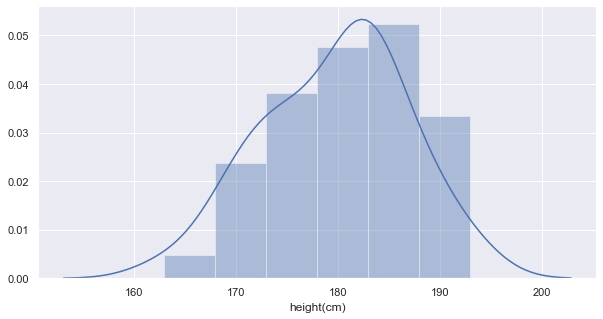

In [35]:
plt.figure(figsize=(10,5))
sns.set()
sns.distplot(data['height(cm)'])

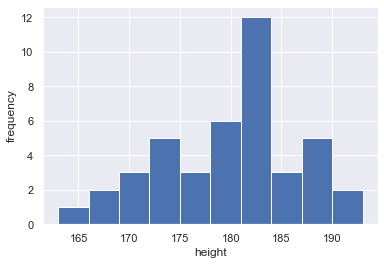

In [36]:
plt.hist(data['height(cm)'])
plt.xlabel('height')
plt.ylabel('frequency')
plt.show()

In [37]:
def height_category(heights):
        height_feature = []
        for height in heights:
            if height < 175:
                height_feature.append('short')
            elif height >= 175 and height < 185:
                height_feature.append('medium')
            else:
                height_feature.append('tall')
        return height_feature
        
list_height = list(data['height(cm)'])
data['height_feature'] = height_category(list_height)

In [38]:
data.head(10)

,order,name,height(cm),height_feature
0,1,George Washington,189,tall
1,2,John Adams,170,short
2,3,Thomas Jefferson,189,tall
3,4,James Madison,163,short
4,5,James Monroe,183,medium
5,6,John Quincy Adams,171,short
6,7,Andrew Jackson,185,tall
7,8,Martin Van Buren,168,short
8,9,William Henry Harrison,173,short
9,10,John Tyler,183,medium


<AxesSubplot:xlabel='height_feature', ylabel='count'>

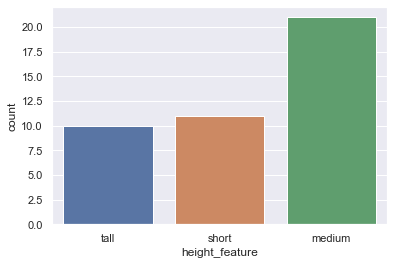

In [39]:
sns.countplot(x='height_feature', data=data)

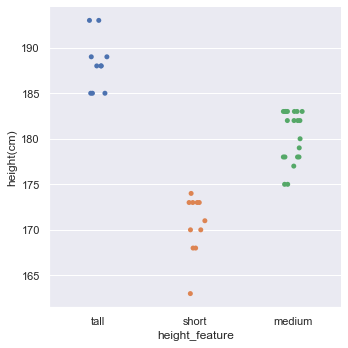

In [40]:
sns.catplot(x='height_feature', y='height(cm)', data=data)

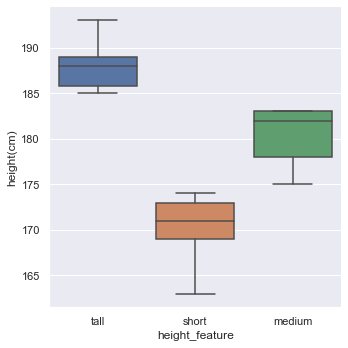

In [41]:
sns.catplot(x='height_feature', y='height(cm)', kind='box', data=data)

In [42]:
data.columns

Index(['order', 'name', 'height(cm)', 'height_feature'], dtype='object')

In [43]:
#pd.get_dummies(data['height_feature'])

In [44]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['height_feature'])
data['height_feature'] = encoder.transform(data['height_feature'])


In [46]:
X = data.loc[:,'height(cm)'].values
y = data.loc[:,'height_feature'].values

In [47]:
X = X.reshape(-1, 1)
print(X.shape)
print(X)

(42, 1)
[[189]
 [170]
 [189]
 [163]
 [183]
 [171]
 [185]
 [168]
 [173]
 [183]
 [173]
 [173]
 [175]
 [178]
 [183]
 [193]
 [178]
 [173]
 [174]
 [183]
 [183]
 [168]
 [170]
 [178]
 [182]
 [180]
 [183]
 [178]
 [182]
 [188]
 [175]
 [179]
 [183]
 [193]
 [182]
 [183]
 [177]
 [185]
 [188]
 [188]
 [182]
 [185]]


In [48]:
print(y)
print(type(y))

[2 1 2 1 0 1 2 1 1 0 1 1 0 0 0 2 0 1 1 0 0 1 1 0 0 0 0 0 0 2 0 0 0 2 0 0 0
 2 2 2 0 2]
<class 'numpy.ndarray'>


In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [50]:
from sklearn.linear_model import LogisticRegression
log_regressor = LogisticRegression()
log_regressor.fit(X_train, y_train)

LogisticRegression()

In [61]:
prediction = log_regressor.predict([[155],[177],[199]])
print(encoder.inverse_transform(prediction))

['short' 'medium' 'tall']


In [52]:
y_pred = log_regressor.predict(X_test)

In [56]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test,y_pred)

array([[6, 2, 0],
       [0, 2, 0],
       [0, 0, 3]], dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         8
           1       0.50      1.00      0.67         2
           2       1.00      1.00      1.00         3

    accuracy                           0.85        13
   macro avg       0.83      0.92      0.84        13
weighted avg       0.92      0.85      0.86        13



# Thank You